In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

%matplotlib inline

# DOL Data Exploration

## Exploring the whole dataset

In [43]:
url = "https://enfxfr.dol.gov/data_catalog/WHD/whd_whisard_20210415.csv.zip"

In [44]:
raw_dol = pd.read_csv(url, 
                      index_col=None,
                      dtype={7:'string'})
raw_dol['findings_start_date'] = pd.to_datetime(raw_dol['findings_start_date'], errors='coerce')
raw_dol['findings_end_date'] = pd.to_datetime(raw_dol['findings_end_date'], errors='coerce')
print(f'raw dataframe has {len(raw_dol.columns)} columns and {len(raw_dol)} rows')

raw dataframe has 110 columns and 313928 rows


In [8]:
raw_dol.head(5)



,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,...,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
0,1428484,Reliant Energy,"Reliant Energy Retail Services, LLC",1000 Main,Houston,TX,77002.0,09310,State Generation and Distribution of Electric ...,0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
1,1784005,Healthcare Services Group at Westwood Center,"Healthcare Services Group, Inc.",298 Main Street,Keene,NH,3431.0,0967,Local Nursing Homes,1,...,0.0,0,0,0,0.0,0,0,0.0,0,2016-06-11 02:22:25 EDT
2,1460300,Central Avenue Bakery,"Central Avenue Bakery, Inc.",679 Central Avenue,Pawtucket,RI,2861.0,311811,Retail Bakeries,4,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
3,1294821,Gallagher Services,Catholic Cherities,2520 Pot Spring Road,Lutherville Timonium,MD,21093.0,09690,Local Group Homes for Mentally and Physically ...,0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
4,1437099,Dragon Dynasty Oriental Mart,NaN,2299 South Ridgewood Avenue,Daytona Beach,FL,32119.0,42449,Other Grocery and Related Products Merchant Wh...,0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST


In [45]:
## to raw data, add a column current of
pattern_datecurrent = r"(whd\_whisard\_)(\d+)(\.)"
pattern_infile = re.search(pattern_datecurrent, url)
raw_dol['current_asof'] = pattern_infile.group(2)

In [9]:
raw_dol.describe()

,case_id,zip_cd,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,flsa_violtn_cnt,flsa_bw_atp_amt,flsa_ee_atp_cnt,...,flsa_smwsl_violtn_cnt,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt
count,3.139280e+05,313909.000000,313928.000000,3.139280e+05,313928.000000,3.139280e+05,313928.000000,313928.000000,3.139280e+05,313928.000000,...,313928.000000,313928.000000,313928.000000,313928.000000,313928.000000,313928.000000,313928.000000,313928.0,313928.0,313928.0
mean,1.643211e+06,50657.631772,35.366982,6.626340e+02,14.364033,1.178336e+04,12.847016,13.806172,8.647439e+03,11.079907,...,0.000035,0.002563,0.000029,0.000051,0.052611,36.049554,0.024429,0.0,0.0,0.0
std,1.933889e+06,29229.133081,1721.327191,1.071741e+04,178.541108,1.324475e+05,175.682302,178.831871,1.157230e+05,173.680698,...,0.007359,0.800899,0.005919,0.007139,2.653201,2806.279199,1.227651,0.0,0.0,0.0
min,0.000000e+00,601.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.506356e+06,27958.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,1.648546e+06,48072.000000,3.000000,0.000000e+00,2.000000,3.465000e+02,1.000000,2.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,1.774682e+06,77583.000000,12.000000,0.000000e+00,9.000000,5.472148e+03,8.000000,9.000000,3.544372e+03,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,1.081029e+09,99929.000000,530002.000000,3.129900e+06,76664.000000,3.970437e+07,76664.000000,76664.000000,3.970437e+07,76664.000000,...,3.000000,382.050000,2.000000,1.000000,595.000000,918682.500000,215.000000,0.0,0.0,0.0


In [10]:
# Show the date range of the data.
max_date = max(raw_dol['findings_end_date'])
min_date = min(raw_dol['findings_start_date'])
print(f'case date range is from {min_date} to {max_date}')
max_entry = max(raw_dol['ld_dt'])
min_entry = min(raw_dol['ld_dt'])
print(f'date entry time range is from {min_entry} to {max_entry}')

case date range is from 1900-01-09 00:00:00 to 2021-03-31 00:00:00
date entry time range is from 2015-02-20 01:00:06 EST to 2021-04-15 00:18:47 EDT


In [11]:
raw_dol.isnull().sum().sort_values(ascending=False)

flsa_repeat_violator      295784
legal_name                  3209
naic_cd                      155
naics_code_description       155
zip_cd                        19
                           ...  
flsa_cl_minor_cnt              0
flsa_cl_violtn_cnt             0
fmla_cmp_assd_amt              0
fmla_ee_atp_cnt                0
ld_dt                          0
Length: 110, dtype: int64

In [12]:
print(len(raw_dol['legal_name'].unique()))
print(f'doesn''t match the df size, so there are repeated employers')

269523
doesnt match the df size, so there are repetitives


In [14]:
# try to create unique identifier
# but weird thing is that adding 'naic_cd' or not yeilds different unique number
raw_dol['combined_id'] = raw_dol[['legal_name','naic_cd','zip_cd','street_addr_1_txt']].apply(
    lambda x: '_'.join(map(str, x)), axis=1)
print(len(raw_dol['combined_id'].unique()))

310002


# quick examination of top states for summer data application

In [46]:
h2_anyviol = raw_dol[raw_dol.h2a_violtn_cnt > 0].copy()
h2_anyviol.head()

## look at top states and add rank col
h2_countbystate = h2_anyviol.groupby('st_cd').agg({'case_violtn_cnt': np.sum}).reset_index()
h2_countbystate['state_rank'] = h2_countbystate.case_violtn_cnt.rank(ascending=False)
h2_countbystate.sort_values(by = 'state_rank').head(20)

trla_catchment = ['TX', 'MS', 'LA', 'KY', 'AL','TN']

sum_trla = h2_countbystate[h2_countbystate.st_cd.isin(trla_catchment)]['case_violtn_cnt'].sum()
sum_trla

sum_all = h2_countbystate.case_violtn_cnt.sum()

print("States in TRLA catchment areas comprise {perc} of all H-2A violations".format(perc = 
                                                        sum_trla/sum_all))

States in TRLA catchment areas comprise 0.18235547757820864 of all H-2A violations


### general plotting

In [15]:
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, 'Case total violations over time')

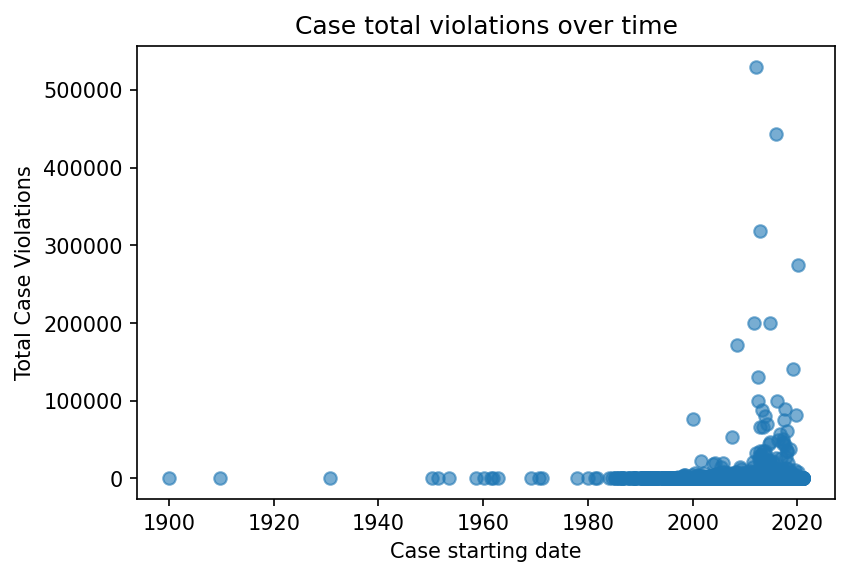

In [16]:
fig, ax1 = plt.subplots()
ax1.scatter(raw_dol['findings_start_date'],raw_dol['case_violtn_cnt'], alpha=0.6)
ax1.set_xlabel('Case starting date')
ax1.set_ylabel('Total Case Violations')
plt.title('Case total violations over time')

Text(0.5, 1.0, 'Total Monetary Penalties over time')

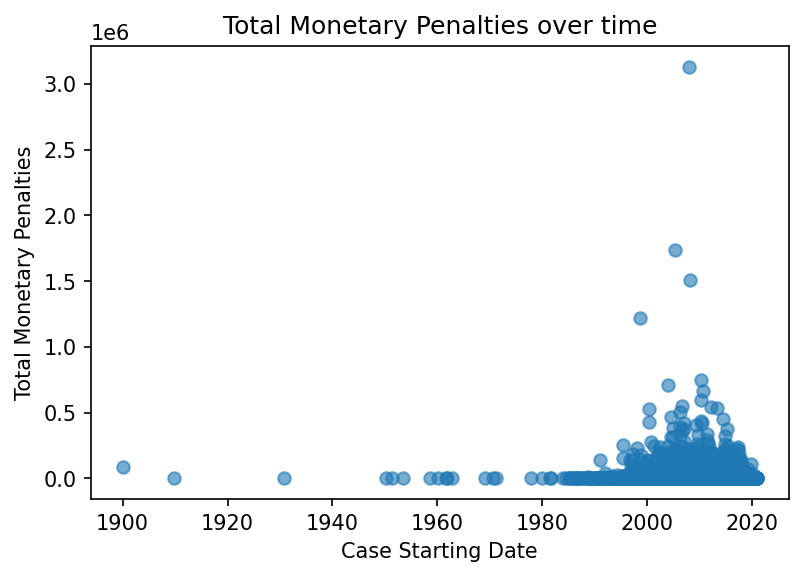

In [114]:
fig, ax1 = plt.subplots()
ax1.scatter(raw_dol['findings_start_date'],raw_dol['cmp_assd_cnt'], alpha=0.6)
ax1.set_xlabel('Case Starting Date')
ax1.set_ylabel('Total Monetary Penalties')
plt.title('Total Monetary Penalties over time')

Text(0.5, 1.0, 'Total Backwages vs. Total Employees')

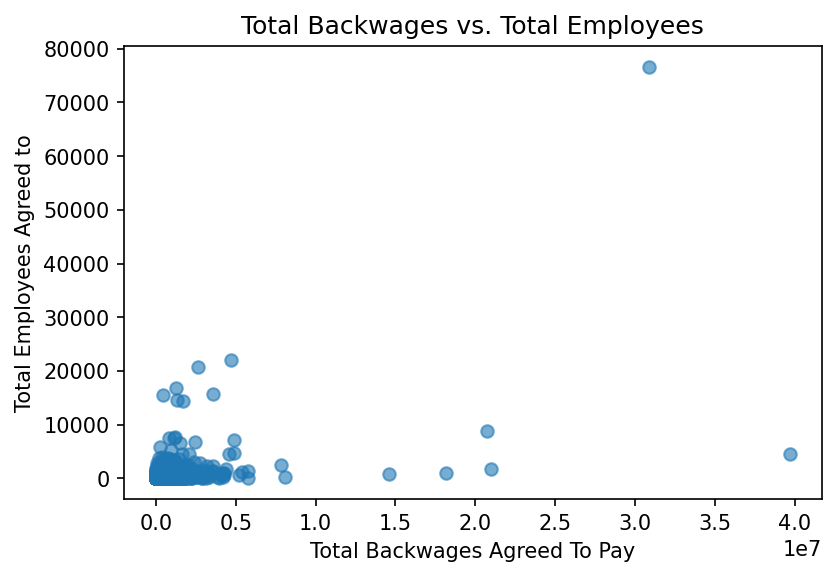

In [136]:
fig, ax1 = plt.subplots()
ax1.scatter(raw_dol['bw_atp_amt'],raw_dol['ee_atp_cnt'], alpha=0.6)
ax1.set_xlabel('Total Backwages Agreed To Pay')
ax1.set_ylabel('Total Employees Agreed to')
plt.title('Total Backwages vs. Total Employees')

## H2A Violation Data

In [210]:
# create indicator column for H2A violation cases
raw_dol['h2a_indicator'] = (raw_dol['h2a_violtn_cnt'] > 0).astype('int')
# pull out the H2A data
h2a_df = raw_dol[(raw_dol['h2a_indicator']==1)]

In [174]:
h2a_df.describe()

,case_id,zip_cd,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,flsa_violtn_cnt,flsa_bw_atp_amt,flsa_ee_atp_cnt,...,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,h2b_indicator,h2a_indicator
count,3.415000e+03,3415.000000,3415.000000,3.415000e+03,3415.000000,3.415000e+03,3415.000000,3415.000000,3415.000000,3415.000000,...,3415.0,3415.000000,3415.00000,3415.0,3415.0,3415.0,3415.0,3415.0,3415.000000,3415.0
mean,1.700525e+06,42937.364568,37.055051,1.001720e+04,17.408785,8.614096e+03,14.448023,2.059444,865.224940,1.293411,...,0.0,0.000293,0.00410,0.0,0.0,0.0,0.0,0.0,0.001171,1.0
std,1.569606e+05,25518.246853,122.372992,6.850848e+04,65.059797,5.184395e+04,57.885127,13.071353,6947.471246,9.538594,...,0.0,0.017112,0.13898,0.0,0.0,0.0,0.0,0.0,0.034209,0.0
min,2.573870e+05,601.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
25%,1.594660e+06,24080.000000,3.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
50%,1.729788e+06,36582.000000,8.000000,1.350000e+03,2.000000,4.078000e+01,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
75%,1.827594e+06,67467.000000,25.000000,5.400000e+03,11.000000,3.962270e+03,8.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
max,1.921534e+06,99357.000000,2667.000000,3.129900e+06,1464.000000,2.338700e+06,1365.000000,398.000000,152868.770000,234.000000,...,0.0,1.000000,6.00000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


Text(0.5, 1.0, 'H2A case violations over time')

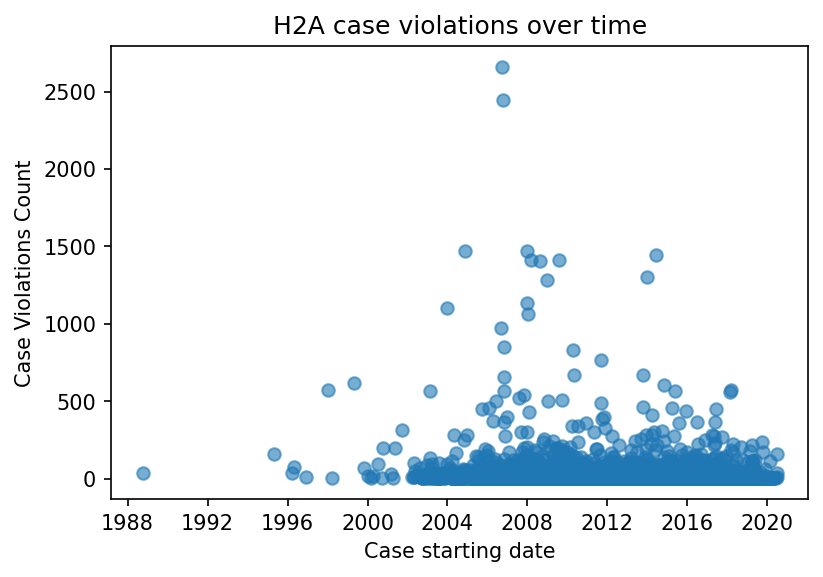

In [205]:
plt.scatter(h2a_df['findings_start_date'],h2a_df['h2a_violtn_cnt'], alpha=0.6)
plt.xlabel('Case starting date')
plt.ylabel('Case Violations Count')
plt.title('H2A case violations over time')

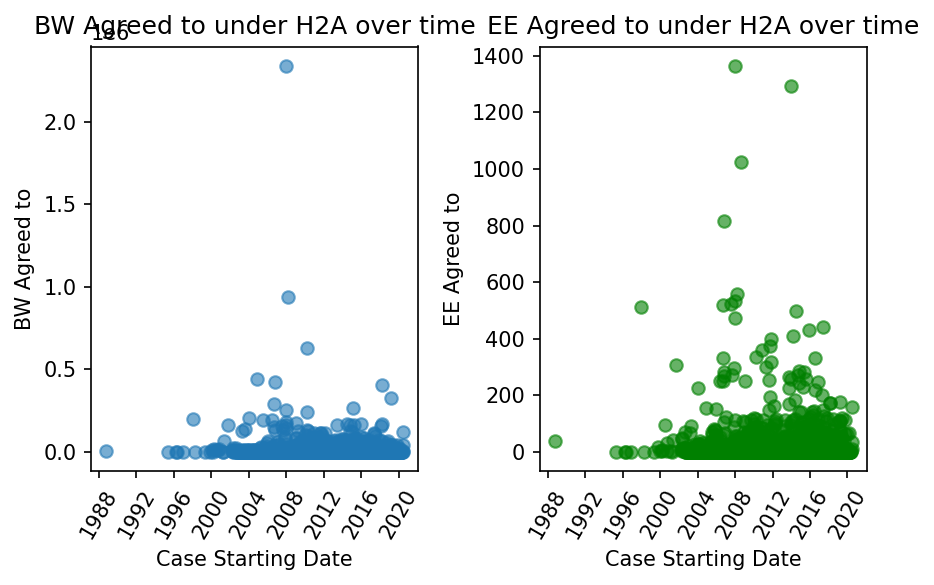

In [177]:
# plots of backwages and employees agreed to overtime
plt.subplot(1, 2, 1)
plt.scatter(h2a_df['findings_start_date'],h2a_df['h2a_bw_atp_amt'], alpha=0.6)
plt.xlabel('Case Starting Date')
plt.ylabel('BW Agreed to')
plt.title('BW Agreed to under H2A over time')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
plt.scatter(h2a_df['findings_start_date'], h2a_df['h2a_ee_atp_cnt'], color='green', alpha=0.6)
plt.xlabel('Case Starting Date')
plt.ylabel('EE Agreed to')
plt.title('EE Agreed to under H2A over time')
plt.xticks(rotation=60)
plt.tight_layout()

Text(0.5, 1.0, 'H2A Backwages vs. Employees')

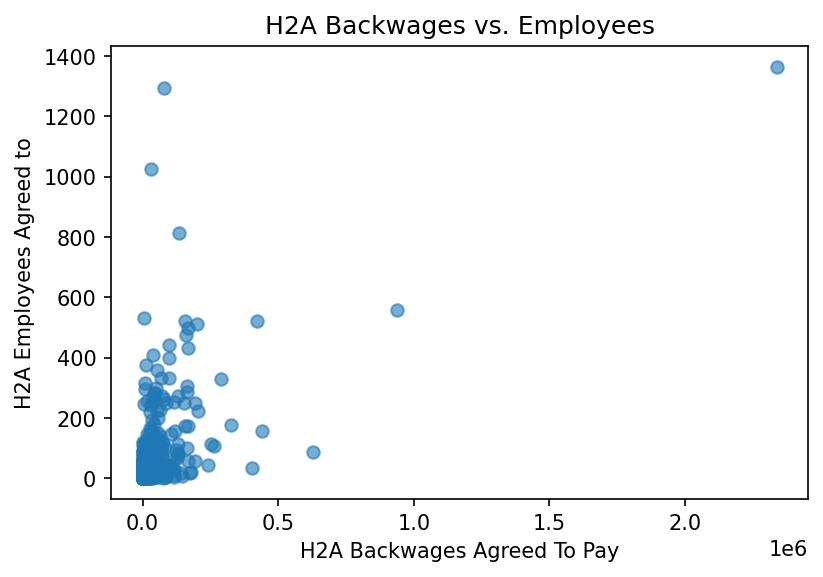

In [185]:
fig, ax1 = plt.subplots()
ax1.scatter(h2a_df['h2a_bw_atp_amt'],h2a_df['h2a_ee_atp_cnt'], alpha=0.6)
ax1.set_xlabel('H2A Backwages Agreed To Pay')
ax1.set_ylabel('H2A Employees Agreed to')
plt.title('H2A Backwages vs. Employees')

## H2B Related Data

In [211]:
# create indicator column for H2B violation cases
raw_dol['h2b_indicator'] = (raw_dol['h2b_violtn_cnt'] > 0.).astype('int')
# pull out the h2b violation data
h2b_df = raw_dol[(raw_dol['h2b_indicator']==1)]

In [250]:
h2b_df.head(5)

,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,...,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt,h2a_indicator,h2b_indicator
999,1627223,"MT ST HELENS REFORESTATION, INC.","MT ST HELENS REFORESTATION, INC.",118 Market Boulevard,Chehalis,WA,98532.0,113110,Timber Tract Operations,255,...,0,3,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,0,1
2590,1613008,Shearon Environmental,"Shearon Environmental Design Co., Inc.",5160 Militia Hill Road,Plymouth Meeting,PA,19462.0,561730,Landscaping Services,128,...,0,63,9005.0,43,0,0.0,0,2016-06-11 02:22:25 EDT,0,1
6737,1590942,Lake County Landscaping,"Lake County Landscape & Supply, Inc",P O Box 70,Grand River,OH,44045.0,561730,Landscaping Services,48,...,0,1,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,1,1
7174,1655210,Oaseas Resorts,"Oaseas, LLC",415 Richard Blvd Jackson Blvd.,Panama City,FL,32408.0,721110,Hotels (except Casino Hotels) and Motels,56,...,0,1,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,0,1
7735,1662573,Ultimate Services Professional Grounds MGMT,Ultimate Services Professional Grounds MGMT,31 Tosun Road,Wolcott,CT,6716.0,561730,Landscaping Services,196,...,0,196,280000.0,89,0,0.0,0,2016-02-19 01:00:04 EST,0,1


In [132]:
h2b_df.describe()

,case_id,zip_cd,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,flsa_violtn_cnt,flsa_bw_atp_amt,flsa_ee_atp_cnt,...,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,h2b_indicator
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,5.410000e+02,541.000000,541.000000,541.000000,541.000000,...,541.0,541.0,541.0,541.000000,541.000000,541.000000,541.0,541.0,541.0,541.0
mean,1.745596e+06,49337.118299,53.371534,16179.400000,27.414048,2.793141e+04,23.072089,15.524954,7795.460998,10.613678,...,0.0,0.0,0.0,28.853974,19536.512163,13.569316,0.0,0.0,0.0,1.0
std,9.821777e+04,29488.208340,136.632315,23000.273403,50.672903,8.354213e+04,38.672178,44.727175,38286.986975,28.972409,...,0.0,0.0,0.0,55.966218,63665.234308,26.034046,0.0,0.0,0.0,0.0
min,1.532503e+06,1201.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
25%,1.665360e+06,21664.000000,5.000000,2388.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,2.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
50%,1.741576e+06,49757.000000,21.000000,8837.600000,12.000000,5.021220e+03,10.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,9.000000,1185.000000,3.000000,0.0,0.0,0.0,1.0
75%,1.835341e+06,77023.000000,56.000000,20913.460000,32.000000,2.565062e+04,29.000000,11.000000,2525.560000,8.000000,...,0.0,0.0,0.0,29.000000,13013.230000,15.000000,0.0,0.0,0.0,1.0
max,1.915934e+06,99686.000000,2645.000000,206689.680000,699.000000,1.277550e+06,342.000000,486.000000,701137.730000,338.000000,...,0.0,0.0,0.0,595.000000,918682.500000,215.000000,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'H2B case violations over time')

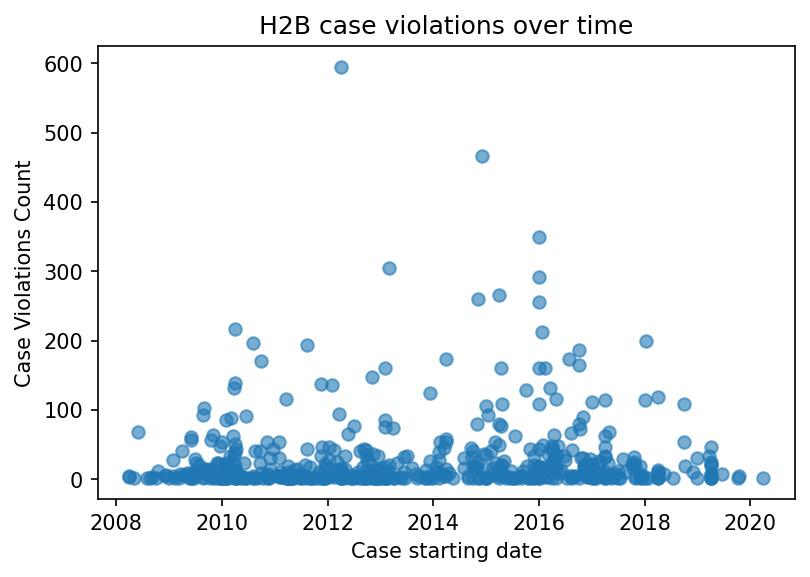

In [134]:
fig, ax1 = plt.subplots()
ax1.scatter(h2b_df['findings_start_date'],h2b_df['h2b_violtn_cnt'], alpha=0.6)
ax1.set_xlabel('Case starting date')
ax1.set_ylabel('Case Violations Count')
plt.title('H2B case violations over time')

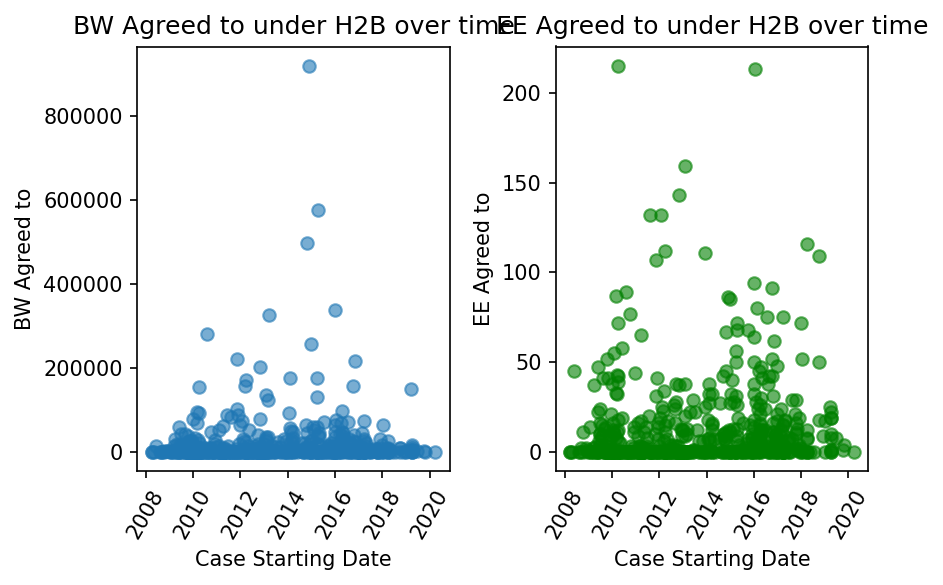

In [155]:
# plots of backwages and employees agreed to overtime
plt.subplot(1, 2, 1)
plt.scatter(h2b_df['findings_start_date'],h2b_df['h2b_bw_atp_amt'], alpha=0.6)
plt.xlabel('Case Starting Date')
plt.ylabel('BW Agreed to')
plt.title('BW Agreed to under H2B over time')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
plt.scatter(h2b_df['findings_start_date'], h2b_df['h2b_ee_atp_cnt'], color='green', alpha=0.6)
plt.xlabel('Case Starting Date')
plt.ylabel('EE Agreed to')
plt.title('EE Agreed to under H2B over time')
plt.xticks(rotation=60)
plt.tight_layout()

Text(0.5, 1.0, 'H2B Backwages vs. Employees')

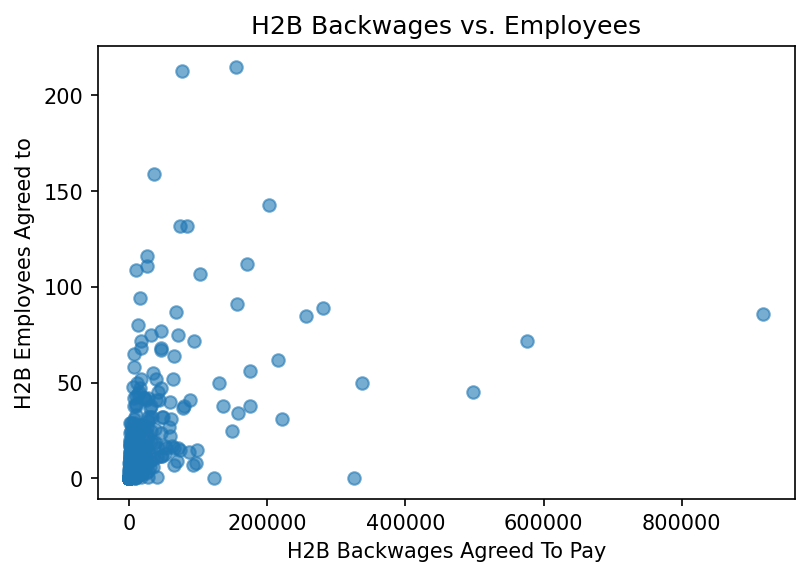

In [184]:
fig, ax1 = plt.subplots()
ax1.scatter(h2b_df['h2b_bw_atp_amt'],h2b_df['h2b_ee_atp_cnt'], alpha=0.6)
ax1.set_xlabel('H2B Backwages Agreed To Pay')
ax1.set_ylabel('H2B Employees Agreed to')
plt.title('H2B Backwages vs. Employees')

## H2 violation comparison

In [244]:
# count of case frequency by state for h2a and h2b
state_freq_h2a = h2a_df['st_cd'].value_counts()
print('top 12 state with most h2a inspected cases')
print(state_freq_h2a[:12])

count of cases by state for h2a
FL    394
NY    315
KY    293
VA    281
NC    155
LA    138
MS    112
TX    104
KS    103
CA     98
PA     96
TN     93
Name: st_cd, dtype: int64


In [245]:
state_freq_h2b = h2b_df['st_cd'].value_counts()
print('top 12 state with most h2b inspected cases')
print(state_freq_h2a[:12])

top 12 state with most h2b inspected cases
FL    394
NY    315
KY    293
VA    281
NC    155
LA    138
MS    112
TX    104
KS    103
CA     98
PA     96
TN     93
Name: st_cd, dtype: int64


Text(0.5, 1.0, 'H2 violation records Frequency by state')

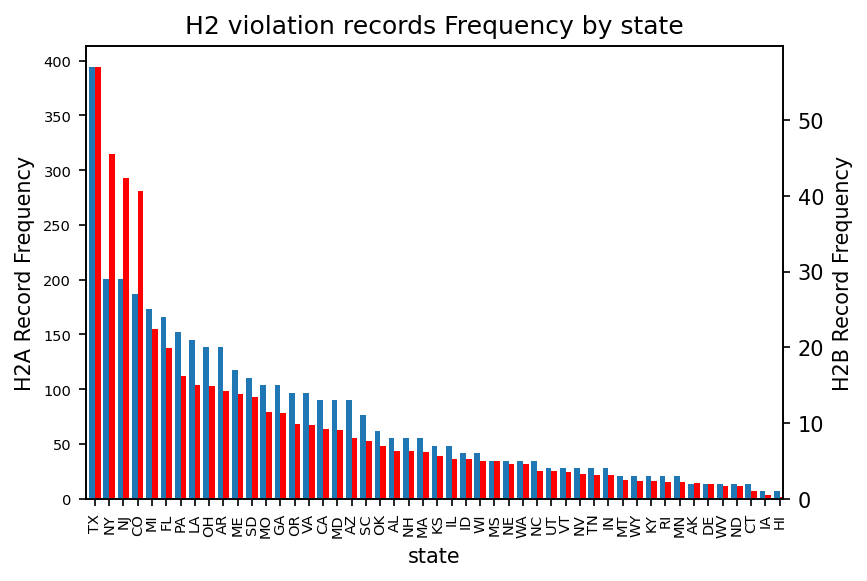

In [246]:
# records per state
# based on the frequency of records, not on violation count
width = 0.4
fig, ax1 = plt.subplots()
state_freq_h2a.plot(kind='bar',color='red', position =0, ax=ax1, width=width)
ax2 = ax1.twinx()
state_freq_h2b.plot(kind='bar', ax=ax2, position=1, width=width)
ax1.set_xlabel('state', fontsize=10)
ax1.set_ylabel('H2A Record Frequency', fontsize=10)
ax2.set_ylabel('H2B Record Frequency')
ax1.tick_params(labelsize=7)
plt.title('H2 violation records Frequency by state')

In [220]:
# count of case frequency by industry code and description for h2a and h2b
h2a_df[['naic_cd','naics_code_description']].value_counts()

naic_cd  naics_code_description                           
111910   Tobacco Farming                                      461
115115   Farm Labor Contractors and Crew Leaders              396
111219   Other Vegetable (except Potato) and Melon Farming    293
111331   Apple Orchards                                       260
111421   Nursery and Tree Production                          202
                                                             ... 
339999   All Other Miscellaneous Manufacturing                  1
424460   Fish and Seafood Merchant Wholesalers                  1
424480   Fresh Fruit and Vegetable Merchant Wholesalers         1
11141    Food Crops Grown Under Cover                           1
333111   Farm Machinery and Equipment Manufacturing             1
Length: 146, dtype: int64

In [221]:
h2b_df[['naic_cd','naics_code_description']].value_counts()

naic_cd  naics_code_description                                         
561730   Landscaping Services                                               146
721110   Hotels (except Casino Hotels) and Motels                            66
541320   Landscape Architectural Services                                    33
115310   Support Activities for Forestry                                     30
722110   Full-Service Restaurants                                            14
                                                                           ... 
48412    General Freight Trucking, Long-Distance                              1
484210   Used Household and Office Goods Moving                               1
48423    Specialized Freight (except Used Goods) Trucking, Long-Distance      1
485113   Bus and Other Motor Vehicle Transit Systems                          1
111211   Potato Farming                                                       1
Length: 111, dtype: int64

In [247]:
# count of H2A violations by state
h2a_vio_state = h2a_df.groupby(['st_cd'])['h2a_violtn_cnt'].sum().sort_values(ascending=False)
print('top 12 state with most h2a violation counts')
print(h2a_vio_state[:12])

top 12 state with most h2a violation counts
st_cd
FL    16882
CA    13529
MS     7267
VA     5898
KY     4929
AZ     4812
NC     4404
NY     4271
WA     4101
GA     3882
LA     3615
TX     3368
Name: h2a_violtn_cnt, dtype: int64


In [248]:
# count of H2B violations by state
h2b_vio_state = h2b_df.groupby(['st_cd'])['h2b_violtn_cnt'].sum().sort_values(ascending=False)
print('top 12 state with most h2b violation counts')
print(h2b_vio_state[:12])

top 12 state with most h2b violation counts
st_cd
TX    1432
NY    1118
NJ     954
MO     895
SD     795
MI     769
IL     683
FL     658
CO     598
CA     516
AZ     473
PA     449
Name: h2b_violtn_cnt, dtype: int64


Text(0.5, 1.0, 'H2A & H2B violation count by state')

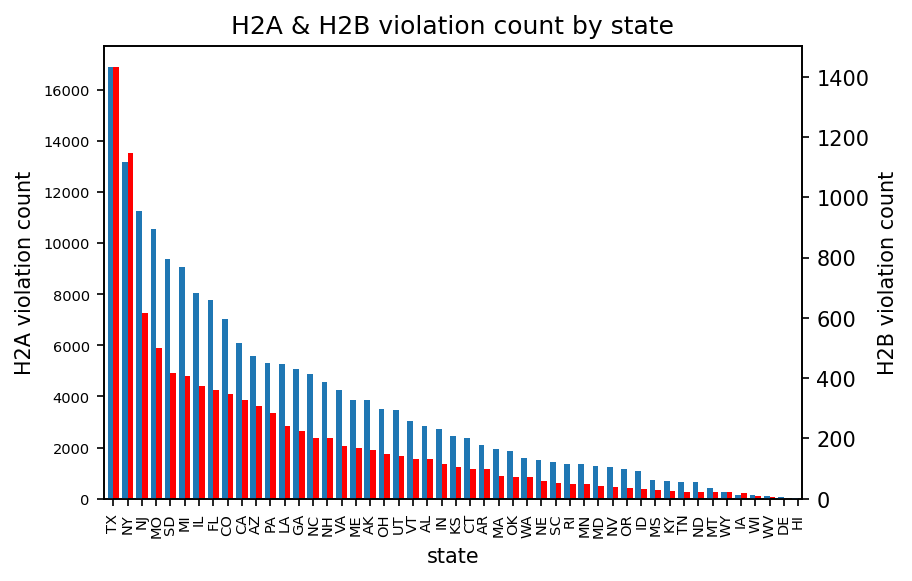

In [249]:
width = 0.4
fig, ax1 = plt.subplots()
h2a_vio_state.plot(kind='bar',color='red', position =0, ax=ax1, width=width)
ax2 = ax1.twinx()
h2b_vio_state.plot(kind='bar', ax=ax2, position=1, width=width)
ax1.set_xlabel('state', fontsize=10)
ax1.set_ylabel('H2A violation count', fontsize=10)
ax2.set_ylabel('H2B violation count')
ax1.tick_params(labelsize=7)
plt.title('H2A & H2B violation count by state')

In [ ]:
# following code are not used
h2_combined = pd.concat([h2a_df, h2b_df], axis=0, ignore_index=False)
h2_combined['ab_group'] = (len(h2a_df)*(0,) + len(h2b_df)*(1,))
h2_combined.reset_index(inplace=True)

In [187]:
h2_df = raw_dol[(raw_dol['h2b_indicator']==1)|(raw_dol['h2a_indicator']==1)]